# Backtest & MA Strategy

Implementação de um backtest simples com o teste de uma estratégia básica de cruzamento de média móvel

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import Backtest as bt

plt.style.use('fivethirtyeight')

## Importando dados

Iremos Utilizar a biblioteca do yahoofinance para importar dados de ações

In [2]:
#ticker = "PETR4.SA"
ticker = 'ITUB4.SA'
yfObj = yf.Ticker(ticker)
data = yfObj.history(start="2009-12-30", end="2020-12-31")
name = yfObj.info['shortName']

In [3]:
#data.drop(columns = ['Dividends', 'Stock Splits'],inplace = True)

In [4]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-30,11.019808,11.163295,10.971023,11.103031,8940087,0.0,0.0
2010-01-04,11.160425,11.619584,11.160425,11.513404,11843397,0.0,0.0
2010-01-05,11.542102,11.588018,11.450270,11.588018,8593315,0.0,0.0
2010-01-06,11.550710,11.619585,11.392875,11.487576,10602572,0.0,0.0
2010-01-07,11.407227,11.493320,11.349832,11.369922,9966567,0.0,0.0


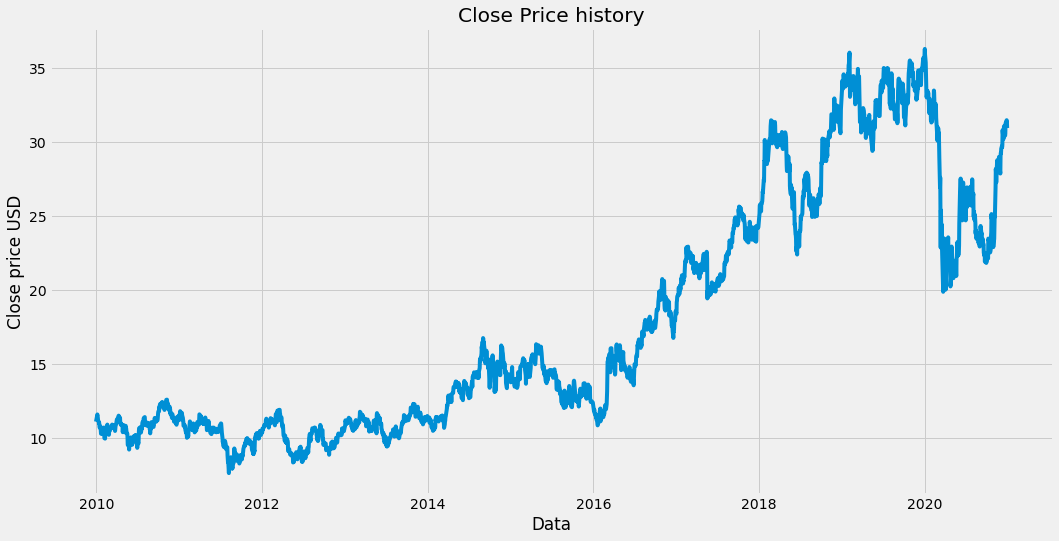

In [5]:
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(data.Close)
plt.xlabel('Data')
plt.ylabel('Close price USD')
plt.show()

##  Moving average (MA) cross-over strategy

Essa estrategia consiste em traçar duas medias moveis, uma curta e outra longa, quando o MA de curto prazo cruza acima do MA de longo prazo, é um sinal de compra, pois indica que a tendência está subindo, quando o MM de curto prazo cruza abaixo do MM de longo prazo, é um sinal de venda, pois indica que a tendência está mudando para baixo.

Implementei de forma que após o sinal de compra ou sinal de venda, esse sinal fosse mantido até a proxima mudança.

In [6]:
def SMA(values, n):
    """
    Retorna media movel n de values
    """
    return pd.Series(values).rolling(n).mean()


def cross_over(data, sma1, sma2):
    sinal = []
    n = len(data)
    
    for i in range(n):
        if (i < n2 -2):
            sinal.append(0)
        elif (sma1[i-2] < sma2[i-2] and sma1[i-1] > sma2[i-1]):
            sinal.append(1)
        elif (sma1[i-2] > sma2[i-2] and sma1[i-1] < sma2[i-1]):
            sinal.append(-1)
        else:
            sinal.append(sinal[i-1])
    return sinal

In [7]:
#media movel curta
n1 = 10
#media movel longa
n2 = 30
sma1 = SMA(data.Close, n1)
sma2 = SMA(data.Close, n2)

data['sma_{}'.format(n1)] = sma1
data['sma_{}'.format(n2)] = sma2
data.fillna(0, inplace = True)
data['cross_over'] = cross_over(data, sma1, sma2)

In [8]:
y = data['cross_over'].value_counts()
y

 1    1498
-1    1192
 0      36
Name: cross_over, dtype: int64

## Backtest

A implementação do backtest é de minha autoria, entretanto, utilizei e me basei no formato e na logica do curso Quant Expert do Rafael Lavrado (mais informações na bibliografia)

In [9]:
bt2 = bt.backtest(data.index, data.Close.values, data.cross_over.values)

### Trades Long

In [10]:
b = bt2.trade_long()
print(b)


       trade    entrada      saida    ndias  perfomance
0    Trade 1 2010-02-25 2010-04-29  63 days    0.061798
1    Trade 2 2010-06-22 2010-07-06  14 days   -0.028537
2    Trade 3 2010-07-13 2010-08-24  42 days   -0.013855
3    Trade 4 2010-09-14 2010-11-22  69 days    0.057727
4    Trade 5 2011-01-06 2011-01-26  20 days   -0.067861
5    Trade 6 2011-02-25 2011-05-02  66 days    0.031888
6    Trade 7 2011-06-29 2011-07-14  15 days   -0.125881
7    Trade 8 2011-09-08 2011-10-06  28 days   -0.010377
8    Trade 9 2011-10-07 2011-11-22  46 days    0.032804
9   Trade 10 2011-12-08 2012-04-02 116 days    0.065476
10  Trade 11 2012-06-13 2012-07-02  19 days   -0.039085
11  Trade 12 2012-07-17 2012-09-05  50 days    0.100457
12  Trade 13 2012-09-20 2012-10-01  11 days   -0.071294
13  Trade 14 2012-11-09 2013-02-06  89 days    0.134112
14  Trade 15 2013-03-01 2013-04-05  35 days   -0.028186
15  Trade 16 2013-05-15 2013-06-13  29 days   -0.058766
16  Trade 17 2013-07-25 2013-08-29  35 days   -0

In [11]:
bt2.long_info()


Perf Long

N Trades:52 
Win:23 
Acerto:44.23% 
Avg Win:10.99% 
Erro:-22% 
Avg Loss:-4.9%  
Avg Total:2.13%  
Avg Holding:42 days 16:09:13.846153846  
Avg Holding Win:64 days 12:31:18.260869565  
Avg Holding Loss:25 days 08:16:33.103448275


### Trades Short

In [12]:
s = bt2.trade_short()
print(s)

       trade    entrada      saida   ndias  performance
0    Trade 1 2010-04-29 2010-06-22 54 days    -0.065517
1    Trade 2 2010-07-06 2010-07-13  7 days     0.089556
2    Trade 3 2010-08-24 2010-09-14 21 days     0.066696
3    Trade 4 2010-11-22 2011-01-06 45 days    -0.034217
4    Trade 5 2011-01-26 2011-02-25 30 days    -0.016989
5    Trade 6 2011-05-02 2011-06-29 58 days    -0.004317
6    Trade 7 2011-07-14 2011-09-08 56 days    -0.056593
7    Trade 8 2011-10-06 2011-10-07  1 days    -0.012265
8    Trade 9 2011-11-22 2011-12-08 16 days     0.130729
9   Trade 10 2012-04-02 2012-06-13 72 days    -0.162042
10  Trade 11 2012-07-02 2012-07-17 15 days     0.018323
11  Trade 12 2012-09-05 2012-09-20 15 days     0.061905
12  Trade 13 2012-10-01 2012-11-09 39 days    -0.039128
13  Trade 14 2013-02-06 2013-03-01 23 days     0.051824
14  Trade 15 2013-04-05 2013-05-15 40 days     0.038310
15  Trade 16 2013-06-13 2013-07-25 42 days    -0.033474
16  Trade 17 2013-08-29 2013-09-11 13 days     0

In [13]:
bt2.short_info()


Perf Short

N Trades:51 
Win:30 
Acerto:58.82% 
Avg Win:5.29% 
Erro:-29% 
Avg Loss:-5.66%  
Avg Total:0.78%  
Avg Holding:34 days 03:17:38.823529412  
Avg Holding Win:27 days 18:24:00  
Avg Holding Loss:43 days 05:42:51.428571428


Patrimonio final:24878


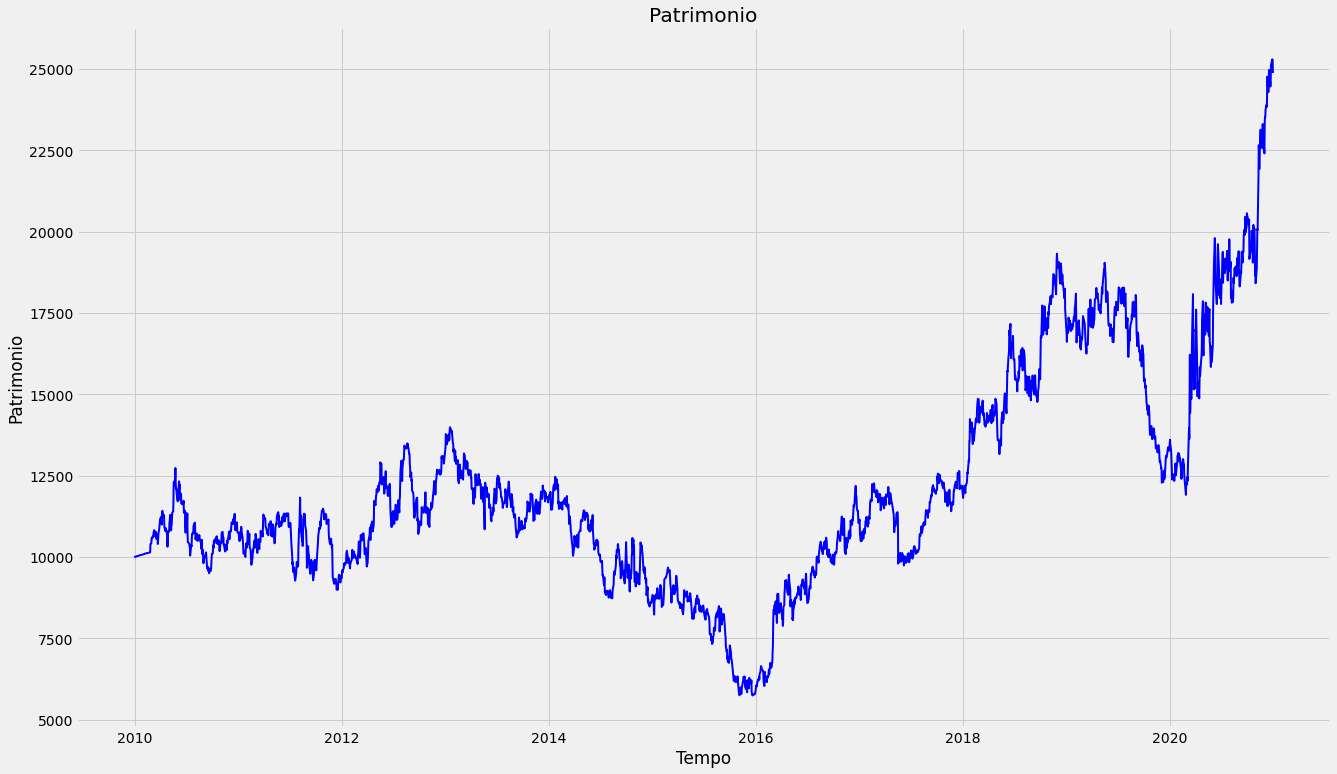

In [14]:
bt2.patrimonio(10000)

## Bibliografia

https://www.udemy.com/course/quant-expert/ <br>
https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp#:~:text=Trading%20Strategies%E2%80%94Crossovers,-Crossovers%20are%20one&text=Another%20strategy%20is%20to%20apply,as%20a%20%22golden%20cross.%22